# Modelos ARIMA, SARIMA. Diagnóstico.


por **Cibele Russo**

Baseado em 

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.


Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- HYNDMAN, R. J., ATHANASOPOULOS, G.; Forecasting: principle and practice: O Texts; 2nd edition. 2018. Acesso em 09/07/2022.

- https://otexts.com/fpp2/non-seasonal-arima.html
- https://otexts.com/fpp2/seasonal-arima.html



**Vamos fazer uma pequena revisão da aula anterior?**

Sejam

- $\tilde{Z}_t = Z_t -\mu$


- $B^m Z_t = Z_{t-m}$ (Operador translação (defasagem, backshift))


- $F^m Z_t = Z_{t+m}$ (Operador translação para o futuro (forward))


- $\Delta = (1-B)$ (Operador diferença)


- $S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$ (Operador soma)






## Modelos autorregressivos - AR(p)

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$$

onde $a_{t}$ é um ruído branco.

Sendo o operador autorregressivo estacionário de ordem p dado por

$$\phi(B) = 1-\phi_1 B-\phi_2 B^2-\ldots -\phi_p B^p,$$

podemos reescrever o modelo AR(p) como

$$\phi(B)\tilde{Z}_{t} =  a_{t}$$


## Modelos de médias móveis - MA(q)

$$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

$$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t $$

Assim

$$\tilde{Z}_{t}=\theta(B) a_t$$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.


## Modelos ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

ou podemos reescrever

$$\phi(B)\tilde{Z}_{t} = \theta(B) a_t$$

em que 

- $\phi(B)$ é o operador autorregressivo

- $\theta(B)$ é o operador de médias móveis


# Modelos ARIMA (p,d,q)


**Componentes de um modelo ARIMA (p,d,q):**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.





Considere que $Z_t$ não é estacionária mas 

$$W_t = \Delta^d Z_t$$

é uma série estacionária e utilizamos portanto um modelo ARMA(p,q) para $W_t$, ou seja,

$$\phi(B) W_t = \theta(B) a_t.$$

Se $W_t$ for uma diferença de $Z_t$, então dizemos que $Z_t$ segue um modelo autorregressivo _integrado_ de médias móveis, ou um modelo ARIMA:

$$\phi(B) \Delta^d Z_t = \theta(B) a_t$$

de ordem (p,d,q) e escrevemos ARIMA (p,d,q) em que $p$ e $q$ são as ordens de $\phi(B)$ e $\theta(B)$, respectivamente.



# Modelos SARIMA (p,d,q)x(P, D,Q)m

- **SARIMA: ARIMA com sazonalidade**


- Componente sazonal se repete a cada $m$ observações ($m>1$).


- Com dados mensais e $m=12$, tipicamente espera-se que $Z_t$ dependa de $Z_{t-12}$ e talvez $Z_{t-24}$ além de $Z_{t-1}, Z_{t-2}$, ...


- Tomar a primeira diferença $\Delta Z_t = Z_t -Z_{t-1}$ não é suficiente para tornar a
série (aproximadamente) estacionária.


- Considere as diferenças sazonais 
$$\Delta_m Z_t = (1 - B^m )Z_t = Z_t - Z_{t-m}$$
sendo $m$ o periodo da sazonalidade.


- A D-ésima diferença sazonal é denotada por $\Delta^D_m$.


- Combinando-se diferenciação simples e sazonais obtem-se o operador $\Delta^d\Delta^D_m$.


**Componentes de um modelo SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

Aqui $m$ é o período da sazonalidade.


$$\phi(B) \Phi(B^m ) W_t = \theta(B) \Theta(B^m ) a_ t$$

onde

- $\phi(B) = (1-\alpha_1 B-\ldots \alpha_p B^p)$

- $\Phi(B^m)= (1- \phi_1 B^m-\ldots - \phi_p B^{P_m})$

- $W_t = \Delta^d \Delta^D Z_t = (1-B)^d (1-B^m)^D Z_t$

- $\theta(B) = (1+\beta_1 B + \ldots + \beta_q B^q)$

- $\Theta(B^m) = (1+\theta_1 B^m+\ldots+\theta_Q B^{Q_m})$






**Exemplo:** Série mensal com 1 diferença simples e 1 sazonal com período 12


$\begin{array}{lll}
\Delta \Delta_{12} Z_t & =& (1-B)(1-B^{12})Z_t\\
&=& (1-B-B^{12}+B^{13}) Z_t\\
&=& Z_t-Z_{t-1}-Z_{t-12}+Z_{t-13}\end{array}$


**Exemplo:** Modelo $\mbox{ SARIMA(1,0,0)}\times(0,1,1)_{12}$


$\begin{array}{rll}
(1-\phi B)(1-B^{12})Z_t &=& (1-\theta B^{12})a_t\\
Z_t &=& Z_{t-12}+\phi(Z_{t-1}-Z_{t-13})+a_t-\theta a_{t-12}\end{array}$



**Observações**

- Na prática os valores de d e D em geral não serão muito maiores do que 1 e um número pequeno de coeficientes será suficiente.

-  Especificar os valores de d e D que tornam a série (aproximadamente) estacionária e remove a maior parte da sazonalidade.

-  Os valores de p, P, q e Q devem ser especificados com base nas funções de autocorrelação e autocorrelação parcial da série diferenciada.

-  Os valores de P e Q são especificados basicamente olhando-se para as defasagens $k = m, 2m, \ldots.$ 

## Aplicação

In [1]:
!pip show statsmodels

Name: statsmodels
Version: 0.12.0
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /home/cibele/.local/lib/python3.9/site-packages
Requires: numpy, pandas, patsy, scipy
Required-by: GaugeRnR, pingouin, pmdarima, tobler


In [2]:
!pip show pmdarima

Name: pmdarima
Version: 1.7.1
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /home/cibele/.local/lib/python3.9/site-packages
Requires: Cython, joblib, numpy, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
Required-by: 


<AxesSubplot:>

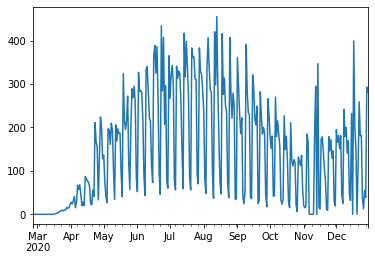

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 

covidSP = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', index_col='date', parse_dates=True)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['deaths'].plot()

In [4]:
covidSP.index.max()


Timestamp('2020-12-30 00:00:00', freq='D')

Vamos considerar a decomposição em sazonalidade e tendência em um modelo aditivo, nesse caso porque temos muitos zeros.

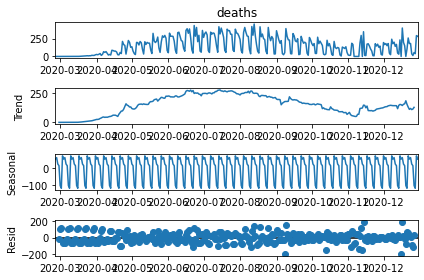

In [5]:
result = seasonal_decompose(covidSP['deaths'], model='additive')
result.plot();

Há sazonalidade nos dados, devido à sistemática de notificações

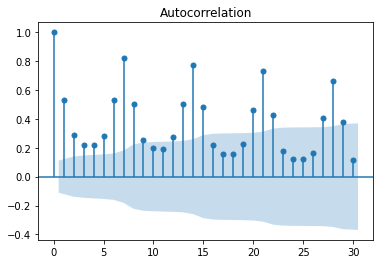

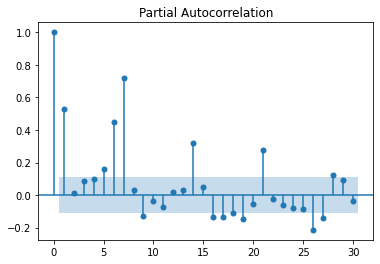

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['deaths'], lags=30)
plot_pacf(covidSP['deaths'], lags=30)
plt.show()

In [7]:
# Ajuste de modelo SARIMA 

auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()


stepwise_fit = auto_arima(covidSP['deaths'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3579.716, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3825.903, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3563.494, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3581.821, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3823.921, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3808.539, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3519.108, Time=0.86 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3488.255, Time=1.23 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3486.546, Time=0.57 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3683.983, Time=0.19 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3488.166, Time=1.45 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3635.827, Time=0.47 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3454.120, Time=0.92 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  309
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1687.462
Date:                           Thu, 28 Jul 2022   AIC                           3384.924
Time:                                   18:47:35   BIC                           3403.574
Sample:                                        0   HQIC                          3392.381
                                           - 309                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0284      0.112      0.253      0.800      -0.192       0.248
ma.L1         -0.9223      0.023    -39.389      0.000      -0.968      -0.876
ar.S.L7        0.9654      0.023     42.109      0.000       0.920       1.010
ma.S.L7       -0.6359      0.057    -11.062      0.000      -0.749      -0.523
sigma2      3249.3425    149.177     21.782      0.000    2956.961    3541.724
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):               415.83
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               2.80   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
len(covidSP)

309

In [9]:
len(covidSP)*0.9

278.1

In [10]:
treino = covidSP.iloc[:278]
teste = covidSP.iloc[278:]

In [11]:
modelo = SARIMAX(treino['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultado = modelo.fit()
resultado.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83314D+00    |proj g|=  1.04700D-01

At iterate    5    f=  5.75463D+00    |proj g|=  1.06307D-02

At iterate   10    f=  5.51724D+00    |proj g|=  2.13015D-02


 This problem is unconstrained.



At iterate   15    f=  5.46954D+00    |proj g|=  3.63250D-02

At iterate   20    f=  5.41107D+00    |proj g|=  9.63318D-03

At iterate   25    f=  5.41041D+00    |proj g|=  1.08686D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     39      1     0     0   8.467D-07   5.410D+00
  F =   5.4104095202746123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  278
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1504.094
Date:                           Thu, 28 Jul 2022   AIC                           3016.188
Time:                                   18:47:35   BIC                           3030.684
Sample:                               02-26-2020   HQIC                          3022.004
                                    - 11-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9181      0.024    -38.831      0.000      -0.964      -0.872
ar.S.L7        0.9652      0.018     54.001      0.000       0.930       1.000
ma.S.L7       -0.6308      0.052    -12.188      0.000      -0.732      -0.529
sigma2      2935.5279    135.111     21.727      0.000    2670.715    3200.341
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               544.32
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
resultado.fittedvalues

2020-02-26      0.000000
2020-02-27      0.000000
2020-02-28      0.000000
2020-02-29      0.000000
2020-03-01      0.000000
                 ...    
2020-11-25    169.507879
2020-11-26    171.827274
2020-11-27     75.706649
2020-11-28    134.617344
2020-11-29     23.736998
Freq: D, Length: 278, dtype: float64

In [13]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False).rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')
previsões.index = teste.index


In [14]:
previsões

2020-11-30     20.603687
2020-12-01    133.815349
2020-12-02    162.274844
2020-12-03    173.645901
2020-12-04     98.627127
2020-12-05    138.719555
2020-12-06     28.732561
2020-12-07     24.062745
2020-12-08    133.331341
2020-12-09    160.799617
2020-12-10    171.774629
2020-12-11     99.368695
2020-12-12    138.064738
2020-12-13     31.908497
2020-12-14     27.401327
2020-12-15    132.864191
2020-12-16    159.375770
2020-12-17    169.968533
2020-12-18    100.084435
2020-12-19    137.432728
2020-12-20     34.973818
2020-12-21     30.623629
2020-12-22    132.413312
2020-12-23    158.001515
2020-12-24    168.225341
2020-12-25    100.775247
2020-12-26    136.822731
2020-12-27     37.932377
2020-12-28     33.733700
2020-12-29    131.978136
2020-12-30    156.675124
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [15]:
for i in range(len(previsões)):
    print(f"predicted={previsões[i]:<11.10}, expected={teste['deaths'][i]}")

predicted=20.60368705, expected=19.0
predicted=133.8153487, expected=195.0
predicted=162.2748439, expected=166.0
predicted=173.6459009, expected=181.0
predicted=98.62712691, expected=151.0
predicted=138.7195552, expected=181.0
predicted=28.73256105, expected=46.0
predicted=24.06274487, expected=25.0
predicted=133.3313413, expected=242.0
predicted=160.7996166, expected=179.0
predicted=171.7746295, expected=200.0
predicted=99.36869511, expected=141.0
predicted=138.0647385, expected=169.0
predicted=31.90849715, expected=47.0
predicted=27.40132667, expected=32.0
predicted=132.8641914, expected=232.0
predicted=159.3757702, expected=0.0
predicted=169.9685328, expected=399.0
predicted=100.0844351, expected=197.0
predicted=137.4327284, expected=151.0
predicted=34.97381811, expected=0.0
predicted=30.62362852, expected=107.0
predicted=132.413312 , expected=259.0
predicted=158.0015152, expected=181.0
predicted=168.2253409, expected=182.0
predicted=100.7752465, expected=37.0
predicted=136.8227307,

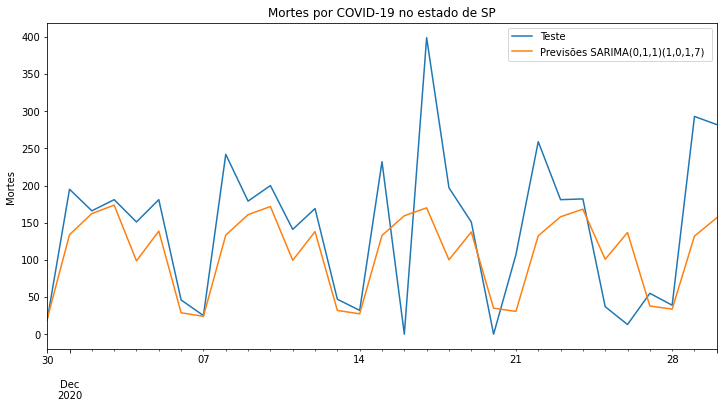

In [16]:
# Plot predictions against known values
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes '
xlabel=''

ax = teste['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

<AxesSubplot:>

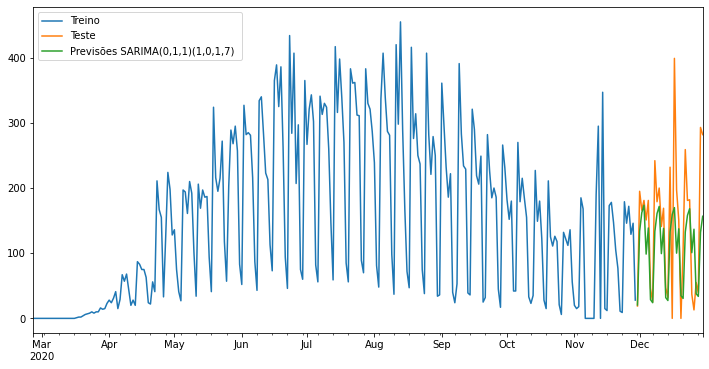

In [17]:
treino['deaths'].plot(legend=True, label='Treino')
teste['deaths'].plot(legend=True, label='Teste')
previsões.plot(legend=True, figsize=(12,6))

### Previsões para dados cujos tempos ainda não estão nas bases

In [18]:
# Notem o uso de "trend", vejam o help para outras variações = Aqui tem mais uma possibilidade para buscar o melhor ajuste.

modelo = SARIMAX(covidSP['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7), trend='c')
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14).rename('Previsões SARIMA(1,0,1)(1,0,1,7)')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85370D+00    |proj g|=  1.17058D-01

At iterate    5    f=  5.78649D+00    |proj g|=  1.43190D-02

At iterate   10    f=  5.74890D+00    |proj g|=  2.20926D-02

At iterate   15    f=  5.55989D+00    |proj g|=  3.53204D+00

At iterate   20    f=  5.55699D+00    |proj g|=  1.36186D-03

At iterate   25    f=  5.55698D+00    |proj g|=  1.25231D-01

At iterate   30    f=  5.52008D+00    |proj g|=  1.02987D-01

At iterate   35    f=  5.46435D+00    |proj g|=  6.02783D-03

At iterate   40    f=  5.46104D+00    |proj g|=  4.69587D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

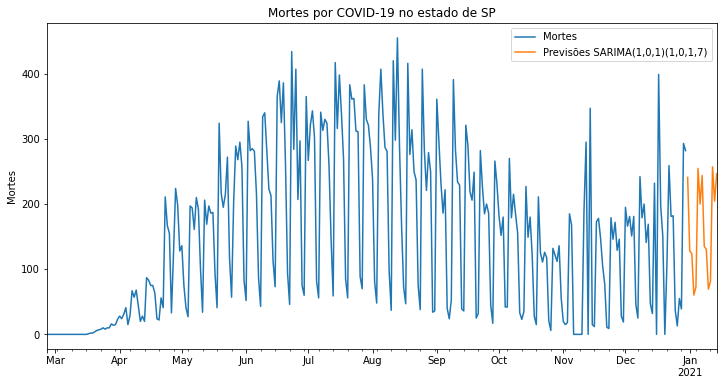

In [19]:
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes'
xlabel=''

ax = covidSP['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Mortes')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

**Exercício: É possível melhorar as previsões para os dados de PETR4 com o SARIMA sazonal?**

## Diagnóstico em modelos SARIMA

### Métricas

In [20]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['deaths'], previsões)
print(f'EQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

EQM SARIMA(0,1,1)(1,0,1,7): 6675.236699


In [21]:
from statsmodels.tools.eval_measures import rmse

error = rmse(teste['deaths'], previsões)
print(f'REQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

REQM SARIMA(0,1,1)(1,0,1,7): 81.70212175


### Análise de resíduos

Considere inicialmente um modelo ARIMA

$$\phi(B) W_t = \theta(B) a_t$$ com $W_t = \Delta^d Z_t$ supondo que $a_t$ é um ruído branco.

Se o modelo for verdadeiro, então os erros verdadeiros $a_t = \theta^{-1}(B) \phi(B) W_t$ devem ser um ruído branco.

Uma análise equivalente poderia ser feita para modelos mais gerais SARIMA.

Quando o modelo é estimado, ou seja, quando são obtidos $\widehat{\theta}$ e $\widehat{\phi}$, as quantidades

$$\widehat{a}_t = \widehat{\theta}^{-1}(B) \widehat{\phi}(B) W_t$$

são chamadas de **resíduos**. Se o modelo for correto, eles devem ser aproximadamente não correlacionados.

Uma forma de analisar os resíduos ajustados é simplesmente considerar

$$r_t = Z_t - \widehat{Z}_t$$

e podemos analisar a distribuição, estatísticas descritivas, a autocorrelação dos resíduos e verificar se existe algum padrão nos mesmos.

Leitura adicional: https://otexts.com/fpp2/residuals.html

In [22]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid

In [23]:
resíduos.describe()

count    309.000000
mean      -0.376527
std       57.008306
min     -291.854055
25%      -24.505885
50%       -1.613776
75%       23.351137
max      306.679292
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa02f2a9220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa02f2a9940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa02f2a1e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa02f2ad0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa02f2ad430>],
 'means': []}

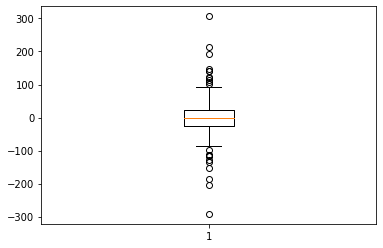

In [24]:
plt.boxplot(resíduos)

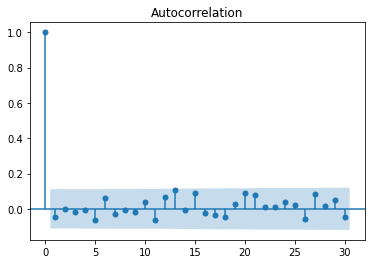

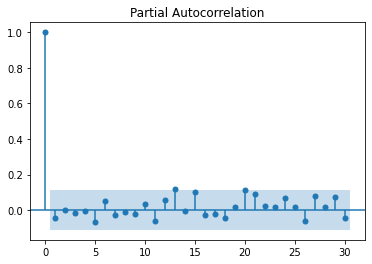

In [25]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

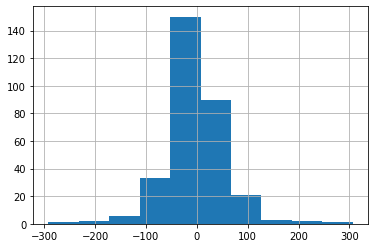

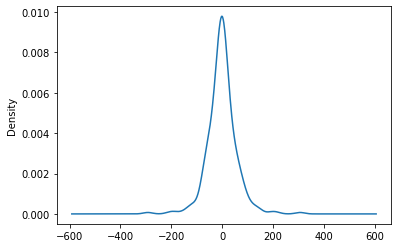

In [26]:
from matplotlib import pyplot


resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

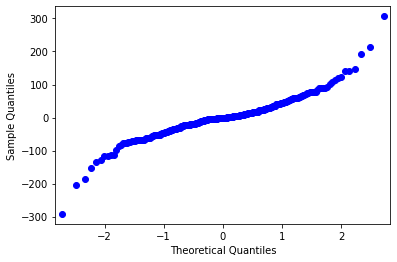

In [27]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resíduos)
pyplot.show()

**Exercício: O que aconteceria com os resíduos se um modelo incorreto tivesse sido ajustado?**